In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [166]:
df = pd.read_csv('Immoweb_antwerpen.csv', index_col='Unnamed: 0')

In [167]:
df.head().T

,0,1,2,3,4
cluster.bedroomRange,NaN,NaN,NaN,NaN,NaN
cluster.maxPrice,NaN,NaN,NaN,NaN,NaN
cluster.maxRoom,NaN,NaN,NaN,NaN,NaN
cluster.maxSurface,NaN,NaN,NaN,NaN,NaN
cluster.minPrice,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
transaction.sale.lifeAnnuity.isJointAndSurvivorContract,NaN,NaN,NaN,NaN,NaN
transaction.sale.lifeAnnuity.lumpSum,NaN,NaN,NaN,NaN,NaN
transaction.sale.lifeAnnuity.monthlyAmount,NaN,NaN,NaN,NaN,NaN
transaction.sale.publicSale.pendingOverbidAmount,NaN,NaN,NaN,NaN,NaN


In [168]:
df.describe()

,cluster.maxPrice,cluster.maxRoom,cluster.maxSurface,cluster.minPrice,cluster.minRoom,cluster.minSurface,cluster.projectInfo,flags.percentSold,has360Tour,id,...,transaction.sale.lifeAnnuity.annuitantAges,transaction.sale.lifeAnnuity.annuitantCount,transaction.sale.lifeAnnuity.contractMaximumDurationDescription,transaction.sale.lifeAnnuity.estimatedPropertyValue,transaction.sale.lifeAnnuity.isBareOwnership,transaction.sale.lifeAnnuity.isIndexed,transaction.sale.lifeAnnuity.isJointAndSurvivorContract,transaction.sale.lifeAnnuity.lumpSum,transaction.sale.lifeAnnuity.monthlyAmount,transaction.sale.publicSale.pendingOverbidAmount
count,1.560000e+02,0.0,142.000000,1.560000e+02,0.0,142.000000,0.0,68.000000,0.0,4.230000e+03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,5.000000,0.0
mean,4.461389e+05,NaN,155.894366,2.920760e+05,NaN,84.978873,NaN,63.661765,NaN,8.576941e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58000.000000,1197.000000,NaN
std,3.128322e+05,NaN,109.970964,1.702733e+05,NaN,43.410210,NaN,20.246695,NaN,3.133755e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34387.497728,633.784269,NaN
min,1.650000e+05,NaN,59.000000,8.750000e+04,NaN,16.000000,NaN,25.000000,NaN,3.816754e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000,335.000000,NaN
25%,2.888432e+05,NaN,106.250000,1.982375e+05,NaN,60.000000,NaN,48.750000,NaN,8.571709e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.000000,795.000000,NaN
50%,3.430000e+05,NaN,127.500000,2.462500e+05,NaN,71.000000,NaN,65.500000,NaN,8.669873e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000,1405.000000,NaN
75%,4.500000e+05,NaN,168.750000,3.282500e+05,NaN,95.250000,NaN,80.000000,NaN,8.728482e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85000.000000,1500.000000,NaN
max,2.200000e+06,NaN,1176.000000,1.122500e+06,NaN,271.000000,NaN,97.000000,NaN,8.764162e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.000000,1950.000000,NaN


In [169]:
len(df)

4230

In [170]:
df.isnull().sum(axis = 0)

cluster.bedroomRange                                       4076
cluster.maxPrice                                           4074
cluster.maxRoom                                            4230
cluster.maxSurface                                         4088
cluster.minPrice                                           4074
                                                           ... 
transaction.sale.lifeAnnuity.isJointAndSurvivorContract    4230
transaction.sale.lifeAnnuity.lumpSum                       4225
transaction.sale.lifeAnnuity.monthlyAmount                 4225
transaction.sale.publicSale.pendingOverbidAmount           4230
transaction.sale.publicSale.status                         4175
Length: 92, dtype: int64

In [171]:
# plt.figure(figsize=(20,20))
# chart = sns.heatmap(df.isnull(), cbar_kws={'fraction' : 0.01}, # shrink colour bar
#     cmap='OrRd')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#

In [172]:
for column in df.columns:
    if df[column].isnull().sum() > 0.8*len(df):
        print(f'dropping {column}')
        df = df.drop(column, axis=1)

dropping cluster.bedroomRange
dropping cluster.maxPrice
dropping cluster.maxRoom
dropping cluster.maxSurface
dropping cluster.minPrice
dropping cluster.minRoom
dropping cluster.minSurface
dropping cluster.projectInfo
dropping cluster.surfaceRange
dropping flags.percentSold
dropping has360Tour
dropping price.additionalValue
dropping price.alternativeDisplayPrice
dropping price.alternativeValue
dropping price.maxRangeValue
dropping price.minRangeValue
dropping price.oldDisplayPrice
dropping price.oldValue
dropping priceType
dropping property.location.approximated
dropping property.location.box
dropping property.location.hasSeaView
dropping property.location.placeName
dropping property.location.pointsOfInterest
dropping property.location.propertyName
dropping property.location.type
dropping property.roomCount
dropping publication.publisherId
dropping transaction.certificate
dropping transaction.certificateLogoUrl
dropping transaction.rental
dropping transaction.sale.hasStartingPrice
dropp

In [173]:
df.columns

Index(['customerLogoUrl', 'customerName', 'flags.main', 'flags.secondary',
       'id', 'isBookmarked', 'media.pictures', 'price.accessibilityPrice',
       'price.label', 'price.language', 'price.mainDisplayPrice',
       'price.mainValue', 'price.shortDisplayPrice', 'price.type',
       'property.bedroomCount', 'property.landSurface',
       'property.location.country', 'property.location.district',
       'property.location.floor', 'property.location.latitude',
       'property.location.locality', 'property.location.longitude',
       'property.location.number', 'property.location.postalCode',
       'property.location.province', 'property.location.region',
       'property.location.regionCode', 'property.location.street',
       'property.netHabitableSurface', 'property.subtype', 'property.title',
       'property.type', 'publication.size', 'publication.visualisationOption',
       'transaction.sale.price', 'transaction.type'],
      dtype='object')

In [174]:
df.describe()


,id,isBookmarked,price.mainValue,property.bedroomCount,property.landSurface,property.location.floor,property.location.latitude,property.location.longitude,property.location.postalCode,property.netHabitableSurface,transaction.sale.price
count,4.230000e+03,4230.0,4.070000e+03,4070.000000,1912.00000,2120.000000,3720.000000,3720.000000,4230.000000,3.617000e+03,4.066000e+03
mean,8.576941e+06,0.0,4.065834e+05,2.771007,823.30910,119.701887,51.198701,4.448282,2409.196454,8.581117e+02,4.070100e+05
std,3.133755e+05,0.0,4.298618e+05,1.829725,2635.76439,5407.888286,0.411236,0.752510,354.170714,4.156613e+04,4.298979e+05
min,3.816754e+06,0.0,2.500000e+03,0.000000,0.00000,0.000000,26.420683,4.290258,2000.000000,5.000000e+00,2.500000e+03
25%,8.571709e+06,0.0,2.173500e+05,2.000000,120.00000,0.000000,51.172364,4.390783,2060.000000,8.900000e+01,2.182498e+05
50%,8.669873e+06,0.0,2.950000e+05,3.000000,246.00000,2.000000,51.208116,4.424106,2390.000000,1.250000e+02,2.950000e+05
75%,8.728482e+06,0.0,4.215750e+05,3.000000,604.25000,3.000000,51.230272,4.458083,2660.000000,1.920000e+02,4.221750e+05
max,8.764162e+06,0.0,6.500000e+06,50.000000,44918.00000,249000.000000,51.474989,50.088794,2990.000000,2.500000e+06,6.500000e+06


In [175]:
df.head().T

,0,1,2,3,4
customerLogoUrl,NaN,https://static.immoweb.be/logos/348077.gif?cac...,https://static.immoweb.be/logos/348077.gif?cac...,https://static.immoweb.be/logos/1237655.gif?ca...,https://static.immoweb.be/logos/459890.gif?cac...
customerName,Schepens Christophe,Trevi Gent,Trevi Gent,Chase,Trevi Axus
flags.main,new,new,new,NaN,new
flags.secondary,[],[],[],['new_price'],[]
id,8.74967e+06,8.74571e+06,8.74572e+06,8.66504e+06,8.74428e+06
isBookmarked,0,0,0,0,0
media.pictures,"[{'smallUrl': None, 'mediumUrl': 'https://stat...","[{'smallUrl': None, 'mediumUrl': 'https://stat...","[{'smallUrl': None, 'mediumUrl': 'https://stat...","[{'smallUrl': None, 'mediumUrl': 'https://stat...","[{'smallUrl': None, 'mediumUrl': 'https://stat..."
price.accessibilityPrice,498500€,185000€,280000€,279000€,184000€
price.label,Price,Price,Price,Price,Price
price.language,en,en,en,en,en


In [176]:
df = df.drop(['customerLogoUrl', 'customerName','media.pictures','property.location.latitude',
         'property.location.longitude', 'property.location.street', 'property.title', 'publication.size',
         'publication.visualisationOption','transaction.type','flags.secondary','id',
              'property.location.number','isBookmarked','price.shortDisplayPrice',
              'price.mainDisplayPrice','price.accessibilityPrice','transaction.sale.price',
              'price.label','price.language','property.location.postalCode','flags.main'], axis = 1)

In [177]:
df.head().T

,0,1,2,3,4
price.mainValue,498500,185000,280000,279000,184000
price.type,residential_sale,residential_sale,residential_sale,residential_sale,residential_sale
property.bedroomCount,5,2,3,4,1
property.landSurface,715,NaN,NaN,94,NaN
property.location.country,Belgium,Belgium,Belgium,Belgium,Belgium
property.location.district,Antwerp,Antwerp,Antwerp,Antwerp,Antwerp
property.location.floor,NaN,6,6,NaN,1
property.location.locality,Brasschaat,Berchem,Berchem,Hoboken,Niel
property.location.province,Antwerp,Antwerp,Antwerp,Antwerp,Antwerp
property.location.region,Flanders,Flanders,Flanders,Flanders,Flanders


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4230 entries, 0 to 4229
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price.mainValue               4070 non-null   float64
 1   price.type                    4230 non-null   object 
 2   property.bedroomCount         4070 non-null   float64
 3   property.landSurface          1912 non-null   float64
 4   property.location.country     4230 non-null   object 
 5   property.location.district    4230 non-null   object 
 6   property.location.floor       2120 non-null   float64
 7   property.location.locality    4230 non-null   object 
 8   property.location.province    4230 non-null   object 
 9   property.location.region      4230 non-null   object 
 10  property.location.regionCode  4230 non-null   object 
 11  property.netHabitableSurface  3617 non-null   float64
 12  property.subtype              4230 non-null   object 
 13  pro

In [179]:
df = df[df['price.mainValue'].notna()]


In [180]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4070 entries, 0 to 4227
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price.mainValue               4070 non-null   float64
 1   price.type                    4070 non-null   object 
 2   property.bedroomCount         4070 non-null   float64
 3   property.landSurface          1912 non-null   float64
 4   property.location.country     4070 non-null   object 
 5   property.location.district    4070 non-null   object 
 6   property.location.floor       2120 non-null   float64
 7   property.location.locality    4070 non-null   object 
 8   property.location.province    4070 non-null   object 
 9   property.location.region      4070 non-null   object 
 10  property.location.regionCode  4070 non-null   object 
 11  property.netHabitableSurface  3617 non-null   float64
 12  property.subtype              4070 non-null   object 
 13  pro

In [181]:
df.head().T

,0,1,2,3,4
price.mainValue,498500,185000,280000,279000,184000
price.type,residential_sale,residential_sale,residential_sale,residential_sale,residential_sale
property.bedroomCount,5,2,3,4,1
property.landSurface,715,NaN,NaN,94,NaN
property.location.country,Belgium,Belgium,Belgium,Belgium,Belgium
property.location.district,Antwerp,Antwerp,Antwerp,Antwerp,Antwerp
property.location.floor,NaN,6,6,NaN,1
property.location.locality,Brasschaat,Berchem,Berchem,Hoboken,Niel
property.location.province,Antwerp,Antwerp,Antwerp,Antwerp,Antwerp
property.location.region,Flanders,Flanders,Flanders,Flanders,Flanders


In [182]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['price.type','property.location.country',
                                            'property.location.district','property.location.locality',
                                            'property.location.province','property.location.region',
                                            'property.location.regionCode',
                                            'property.subtype','property.type']]).toarray())
df = df.join(enc_df)

In [183]:
df = df.drop(columns = ['price.type','property.location.country',
                                            'property.location.district','property.location.locality',
                                            'property.location.province','property.location.region',
                                            'property.location.regionCode',
                                            'property.subtype','property.type'], axis =1)

In [184]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['property.bedroomCount','property.landSurface','property.location.floor','property.netHabitableSurface']]\
    = imp.fit_transform(df[['property.bedroomCount','property.landSurface','property.location.floor','property.netHabitableSurface']])


In [185]:
df.describe()

,price.mainValue,property.bedroomCount,property.landSurface,property.location.floor,property.netHabitableSurface,0,1,2,3,4,...,151,152,153,154,155,156,157,158,159,160
count,4.070000e+03,4070.000000,4070.000000,4070.000000,4.070000e+03,3919.000000,3919.000000,3919.000000,3919.0,3919.0,...,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000
mean,4.065834e+05,2.771007,823.309100,119.701887,8.581117e+02,0.001276,0.012758,0.985966,1.0,1.0,...,0.015565,0.018372,0.003572,0.019393,0.007910,0.020669,0.000766,0.055371,0.531003,0.468997
std,4.298618e+05,1.829725,1806.313321,3902.557808,3.918410e+04,0.035701,0.112244,0.117647,0.0,0.0,...,0.123802,0.134310,0.059670,0.137918,0.088598,0.142290,0.027661,0.228733,0.499102,0.499102
min,2.500000e+03,0.000000,0.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.173500e+05,2.000000,271.250000,1.000000,9.100000e+01,0.000000,0.000000,1.000000,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.950000e+05,3.000000,823.309100,7.000000,1.400000e+02,0.000000,0.000000,1.000000,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.215750e+05,3.000000,823.309100,119.701887,2.370000e+02,0.000000,0.000000,1.000000,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6.500000e+06,50.000000,44918.000000,249000.000000,2.500000e+06,1.000000,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4070 entries, 0 to 4227
Columns: 166 entries, price.mainValue to 160
dtypes: float64(166)
memory usage: 5.3 MB


[Text(0.5, 0, 'price.mainValue'),
 Text(2.5, 0, 'property.landSurface'),
 Text(4.5, 0, 'property.netHabitableSurface'),
 Text(6.5, 0, '1'),
 Text(8.5, 0, '3'),
 Text(10.5, 0, '5'),
 Text(12.5, 0, '7'),
 Text(14.5, 0, '9'),
 Text(16.5, 0, '11'),
 Text(18.5, 0, '13'),
 Text(20.5, 0, '15'),
 Text(22.5, 0, '17'),
 Text(24.5, 0, '19'),
 Text(26.5, 0, '21'),
 Text(28.5, 0, '23'),
 Text(30.5, 0, '25'),
 Text(32.5, 0, '27'),
 Text(34.5, 0, '29'),
 Text(36.5, 0, '31'),
 Text(38.5, 0, '33'),
 Text(40.5, 0, '35'),
 Text(42.5, 0, '37'),
 Text(44.5, 0, '39'),
 Text(46.5, 0, '41'),
 Text(48.5, 0, '43'),
 Text(50.5, 0, '45'),
 Text(52.5, 0, '47'),
 Text(54.5, 0, '49'),
 Text(56.5, 0, '51'),
 Text(58.5, 0, '53'),
 Text(60.5, 0, '55'),
 Text(62.5, 0, '57'),
 Text(64.5, 0, '59'),
 Text(66.5, 0, '61'),
 Text(68.5, 0, '63'),
 Text(70.5, 0, '65'),
 Text(72.5, 0, '67'),
 Text(74.5, 0, '69'),
 Text(76.5, 0, '71'),
 Text(78.5, 0, '73'),
 Text(80.5, 0, '75'),
 Text(82.5, 0, '77'),
 Text(84.5, 0, '79'),
 Text(8

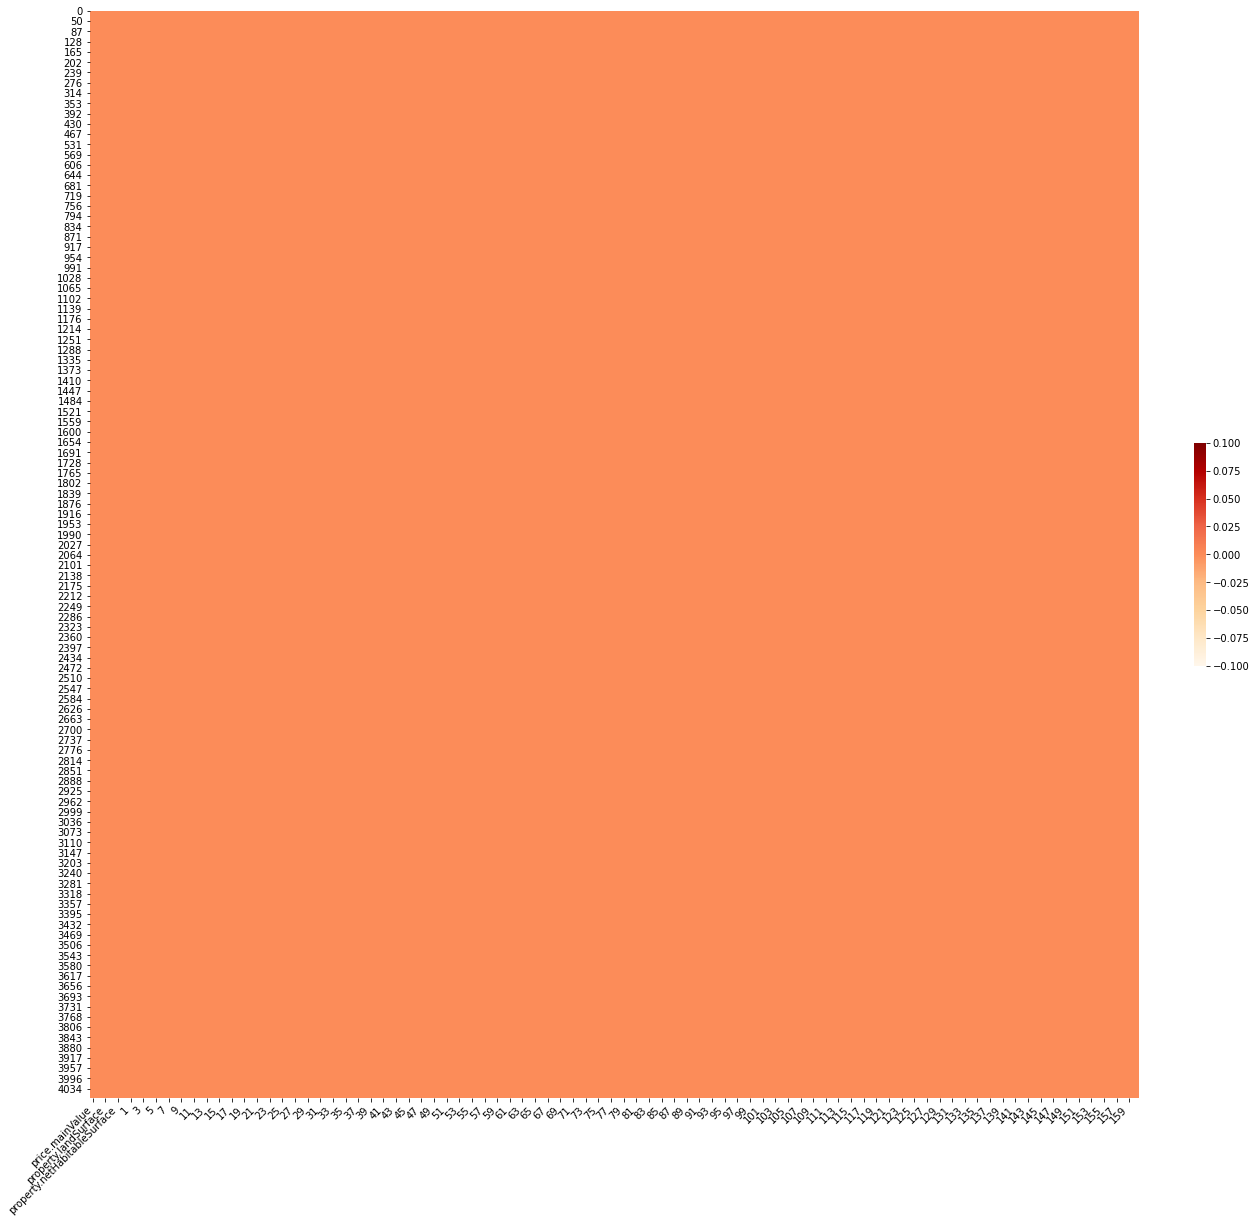

In [187]:
df = df.dropna()

# plt.figure(figsize=(20,20))
# chart = sns.heatmap(df.isnull(), cbar_kws={'fraction' : 0.01}, # shrink colour bar
#     cmap='OrRd')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [191]:
df[df['price.mainValue'] ==df['price.mainValue'].max()]

,price.mainValue,property.bedroomCount,property.landSurface,property.location.floor,property.netHabitableSurface,0,1,2,3,4,...,151,152,153,154,155,156,157,158,159,160
1448,6500000.0,7.0,16750.0,119.701887,1500.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


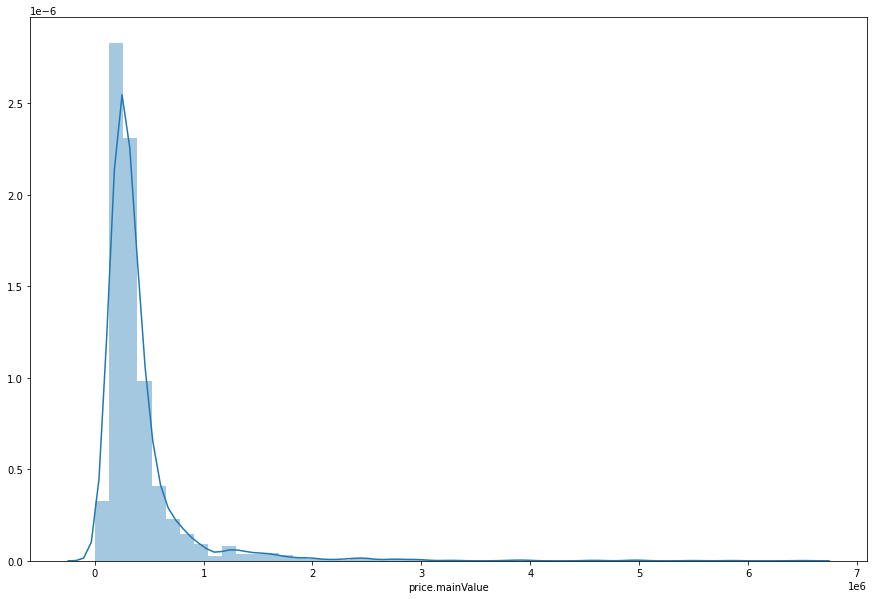

In [154]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['price.mainValue'])


In [155]:
from sklearn.model_selection import train_test_split
X = df.drop('price.mainValue', axis = 1)
y = df['price.mainValue']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [157]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [158]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [159]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_dfy_pred = regressor.predict(X_test)


In [160]:
y_pred = regressor.predict(X_test)


In [161]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
589,399000.0,6.032813e+05
3132,285000.0,2.688813e+05
882,337000.0,3.185453e+05
990,359000.0,3.569453e+05
3224,179000.0,4.097453e+05
3413,549000.0,6.043053e+05
3813,459000.0,2.514733e+05
1848,94000.0,1.173293e+05
1125,192000.0,4.859693e+05
2275,319000.0,4.132653e+05


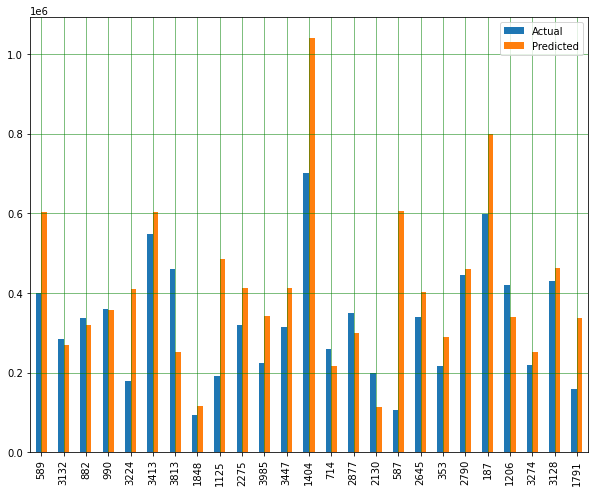

In [162]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [163]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.683263748418699e+16
Mean Squared Error: 2.884207389991417e+34
Root Mean Squared Error: 1.698295436604426e+17
